In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.stattools as stattools
import statsmodels.graphics.tsaplots as tsaplots
from pandas.plotting import autocorrelation_plot

In [4]:
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'}, 
               inplace=True)
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

In [7]:
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]
residuals.head(10)

4      6.6750
5    -26.5125
6    -21.3500
7     60.3000
8      9.0625
9    -31.8875
10   -28.4125
11    48.7500
12    -1.0625
13   -33.6000
Name: Beer_Prod, dtype: float64

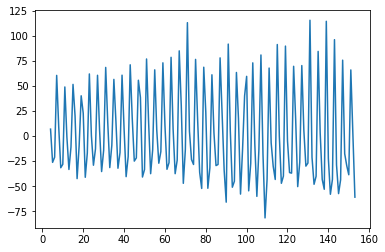

In [9]:
residuals.plot()

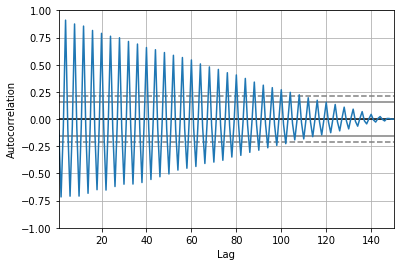

In [11]:
autocorrelation_plot(residuals)

In [12]:
residuals_qtr_diff = residuals.diff(4)
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

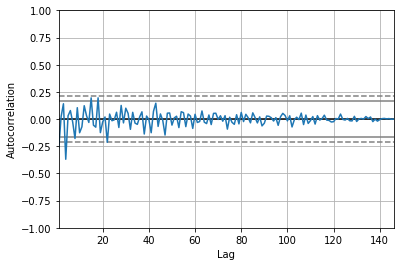

In [13]:
autocorrelation_plot(residuals_qtr_diff)